In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.data')

data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


# Thống Kê Dữ Liệu

## Thông tin dữ liệu 

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [86]:
# Hiển thị thống kê mô tả cho các biến số
print("\nThống kê mô tả:")
print(data.describe())



Thống kê mô tả:
              Rooms         Price      Postcode  Propertycount      Distance
count  63023.000000  4.843300e+04  63023.000000   63023.000000  63023.000000
mean       3.110595  9.978982e+05   3125.673897    7617.728131     12.684829
std        0.957551  5.934989e+05    125.626877    4424.423167      7.592015
min        1.000000  8.500000e+04   3000.000000      39.000000      0.000000
25%        3.000000  6.200000e+05   3056.000000    4380.000000      7.000000
50%        3.000000  8.300000e+05   3107.000000    6795.000000     11.400000
75%        4.000000  1.220000e+06   3163.000000   10412.000000     16.700000
max       31.000000  1.120000e+07   3980.000000   21650.000000     64.100000


## Vẽ biểu đồ phân phối giá

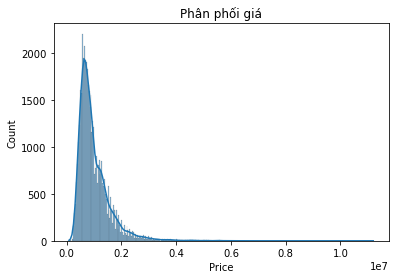

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Biểu đồ phân phối giá
sns.histplot(data['Price'], kde=True)
plt.title('Phân phối giá')
plt.show()


## Vẽ biểu đồ ma trận tương quan

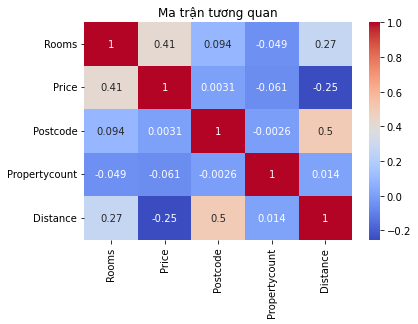

In [88]:
# Ma trận tương quan
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()


## Biểu đồ thể hiện giá trung bình

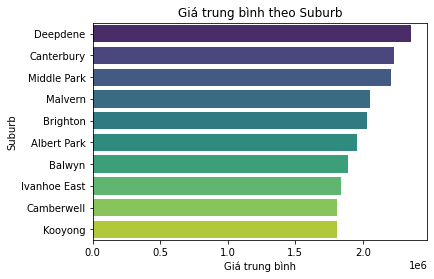

In [89]:
# Biểu đồ thể hiện giá trung bình theo Suburb
average_price_by_suburb = data.groupby('Suburb')['Price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=average_price_by_suburb, y=average_price_by_suburb.index, palette='viridis')
plt.title('Giá trung bình theo Suburb')
plt.xlabel('Giá trung bình')
plt.ylabel('Suburb')
plt.show()


## Vẽ biểu đồ số lượng theo năm

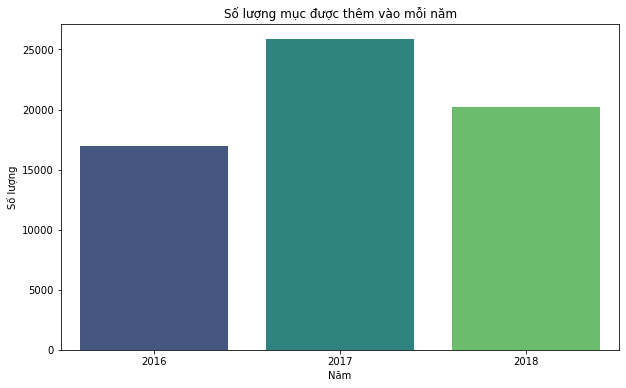

In [90]:
# Chuyển đổi cột 'Date' sang định dạng thời gian
data['Date'] = pd.to_datetime(data['Date'])

# Tạo cột mới 'Year' để lưu năm
data['Year'] = data['Date'].dt.year

# Biểu đồ số lượng mục được thêm vào mỗi năm
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=data, palette='viridis')
plt.title('Số lượng mục được thêm vào mỗi năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng')
plt.show()

## Tính số lượng theo CouncilArea

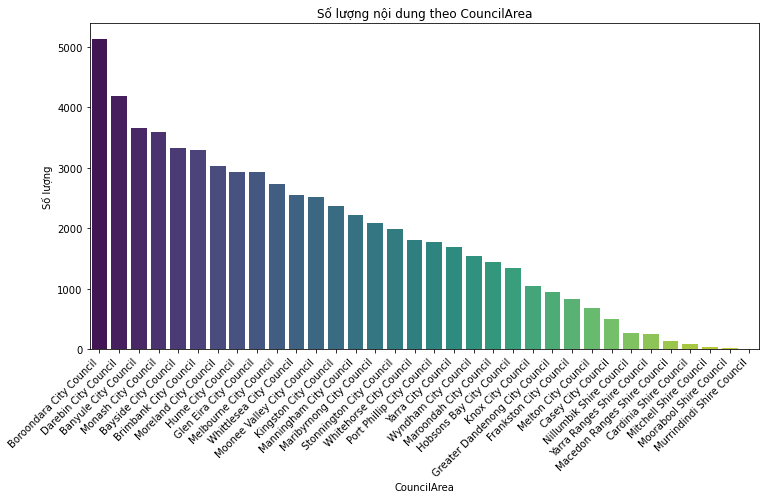

In [91]:
# Tính số lượng mỗi CouncilArea
council_area_counts = data['CouncilArea'].value_counts()

# Lấy ra CouncilArea có số lượng nội dung lớn nhất
most_common_council_area = council_area_counts.idxmax()

# Biểu đồ số lượng nội dung theo CouncilArea
plt.figure(figsize=(12, 6))
sns.barplot(x=council_area_counts.index, y=council_area_counts, palette='viridis')
plt.title('Số lượng nội dung theo CouncilArea')
plt.xlabel('CouncilArea')
plt.ylabel('Số lượng')
plt.xticks(rotation=45, ha='right')  # Xoay tên CouncilArea để dễ đọc
plt.show()

# print(f"CouncilArea có nhiều nội dung nhất là: {most_common_council_area}")

## Tính số lượng theo loại phòng

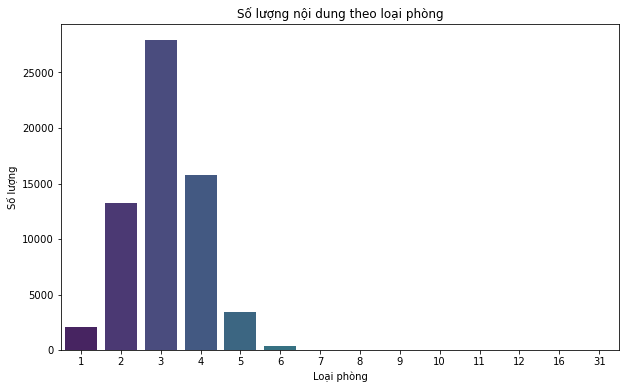

In [92]:
room_counts = data['Rooms'].value_counts()

# Lấy ra loại phòng có số lượng nội dung lớn nhất
most_common_room = room_counts.idxmax()

# Biểu đồ số lượng nội dung theo loại phòng
plt.figure(figsize=(10, 6))
sns.barplot(x=room_counts.index, y=room_counts, palette='viridis')
plt.title('Số lượng nội dung theo loại phòng')
plt.xlabel('Loại phòng')
plt.ylabel('Số lượng')
plt.show()

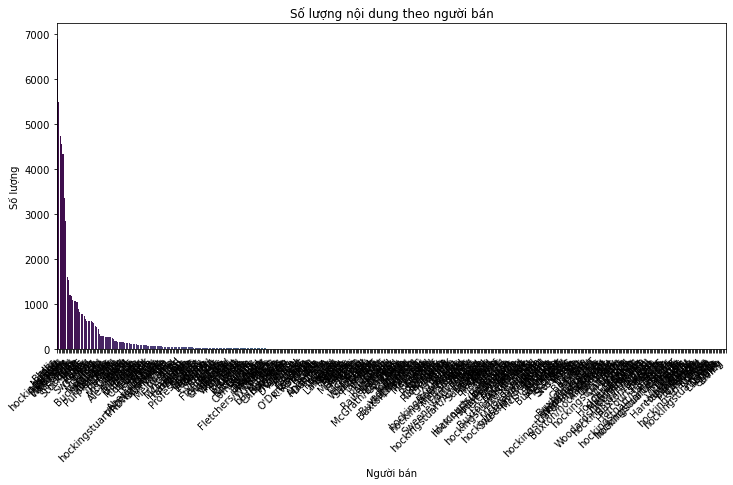

Người bán có nhiều nội dung nhất là: Barry


In [93]:
# Tính số lượng mỗi người bán
seller_counts = data['SellerG'].value_counts()

# Lấy ra người bán có số lượng nội dung lớn nhất
most_common_seller = seller_counts.idxmax()

# Biểu đồ số lượng nội dung theo người bán
plt.figure(figsize=(12, 6))
sns.barplot(x=seller_counts.index, y=seller_counts, palette='viridis')
plt.title('Số lượng nội dung theo người bán')
plt.xlabel('Người bán')
plt.ylabel('Số lượng')
plt.xticks(rotation=45, ha='right')  # Xoay tên người bán để dễ đọc
plt.show()

print(f"Người bán có nhiều nội dung nhất là: {most_common_seller}")

## Kiểm tra giá trị thiếu

In [94]:
missing_values_count = data.isnull().sum()
missing_values_count[0:10]

Suburb            0
Address           0
Rooms             0
Type              0
Price         14590
Method            0
SellerG           0
Date              0
Postcode          0
Regionname        0
dtype: int64

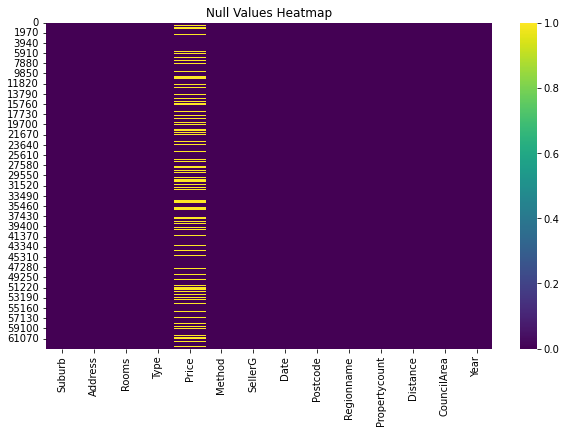

In [95]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=True, cmap='viridis')
plt.title('Null Values Heatmap')
plt.show()

## Loại bỏ các giá trị thiếu

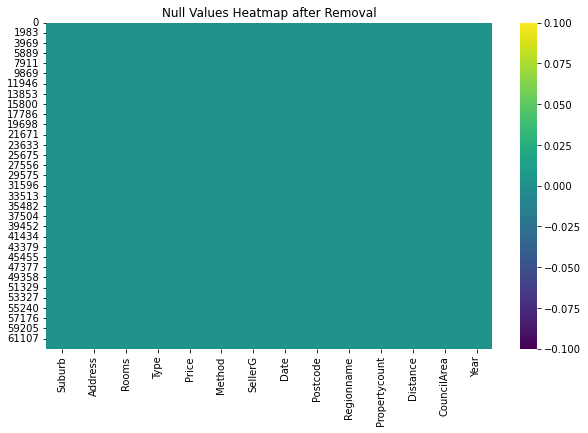

In [96]:
# Loại bỏ các hàng chứa giá trị null
data_cleaned = data.dropna()

# Vẽ lại biểu đồ heatmap sau khi loại bỏ giá trị null
plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned.isnull(), cbar=True, cmap='viridis')
plt.title('Null Values Heatmap after Removal')
plt.show()

## Rút trích các đặc trưng

In [97]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# data = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv').dropna()
# Chọn các đặc trưng số cần chuẩn hóa và rút trích đặc trưng
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
features_for_pca = data_cleaned[numerical_features]

# Chuẩn hóa dữ liệu trước khi áp dụng PCA
scaler = StandardScaler()
features_for_pca_scaled = scaler.fit_transform(features_for_pca)

# Áp dụng PCA
pca = PCA(n_components=2)  # Chọn số thành phần chính muốn giữ lại
principal_components = pca.fit_transform(features_for_pca_scaled)

# Tạo DataFrame mới với các thành phần chính
columns = ['Principal Component 1', 'Principal Component 2']
data_pca = pd.DataFrame(data=principal_components, columns=columns)

# In một số dòng đầu tiên của dữ liệu sau khi rút trích đặc trưng
print("Dữ liệu sau khi rút trích đặc trưng:")
print(data_pca.head())

Dữ liệu sau khi rút trích đặc trưng:
   Principal Component 1  Principal Component 2
0              -1.172061               1.063790
1              -1.167207               0.725685
2              -1.170802               0.976133
3              -0.883505               1.099886
4              -1.023267              -0.750187


In [98]:
missing_values_count = data_pca.isnull().sum()
missing_values_count[0:10]

Principal Component 1    0
Principal Component 2    0
dtype: int64

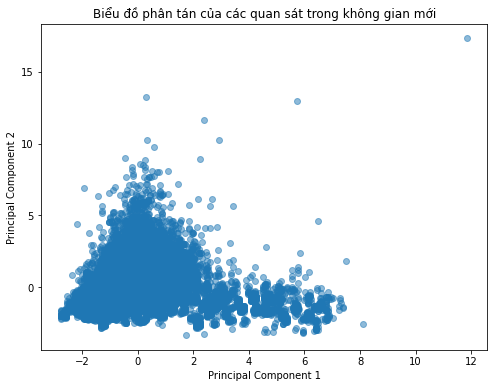

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data_pca['Principal Component 1'], data_pca['Principal Component 2'], alpha=0.5)
plt.title('Biểu đồ phân tán của các quan sát trong không gian mới')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Phân chia dữ liệu

In [116]:
# from sklearn.model_selection import train_test_split

# Đảm bảo bạn có dữ liệu đã đọc, loại bỏ giá trị null, chuẩn hóa và rút trích đặc trưng từ trước
# data_normalized = ...  # DataFrame sau khi chuẩn hóa và rút trích đặc trưng

# Xác định đặc trưng (X) và biến mục tiêu (y)
X = data_pca[['Principal Component 1', 'Principal Component 2']]
y = data_cleaned['Price']  # Thay 'TargetVariable' bằng tên biến mục tiêu thực tế

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xem kích thước của các tập dữ liệu
print("Kích thước tập huấn luyện:", X_train.shape, y_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape, y_test.shape)


Kích thước tập huấn luyện: (38746, 2) (38746,)
Kích thước tập kiểm tra: (9687, 2) (9687,)


# Huấn luyện mô hình

## Mô hình LinearRegression

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# X = X_scaled.drop('Win_Prob', axis=1)
# y = X_scaled['Win_Prob']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chọn một mô hình học máy (ví dụ: hồi quy tuyến tính)
model = LinearRegression()

# Huấn luyện mô hình trên tập train
model.fit(X_train, y_train)

# Dự đoán kết quả trên tập test
y_pred_Linear = model.predict(X_test)

mse_Linear = mean_squared_error(y_test, y_pred_Linear)
r2_Linear = r2_score(y_test, y_pred_Linear)

print(f"Mean Squared Error (MSE) of LinearRegression : {mse_Linear}")
print(f"R-squared (R^2) of LinearRegression: {r2_Linear}")

Mean Squared Error (MSE) of LinearRegression : 73611681547.44919
R-squared (R^2) of LinearRegression: 0.7851172513784134


## Mô hình DecisionTree

In [102]:
# from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# # Chọn các đặc trưng (features) và nhãn (label)
# X = X_scaled.drop('Win_Prob', axis=1)
# y = X_scaled['Win_Prob']

# # Chia tập dữ liệu thành tập huấn luyện và kiểm tra
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Dự đoán kết quả trên tập test
y_pred_deTree = dt_model.predict(X_test)

# Đánh giá hiệu suất của mô hình
mse_deTree = mean_squared_error(y_test, y_pred_deTree)
r2_deTree = r2_score(y_test, y_pred_deTree)

print(f"Mean Squared Error (MSE) of DecisionTree: {mse_deTree}")
print(f"R-squared (R^2) of DecisionTree: {r2_deTree}")

Mean Squared Error (MSE) of DecisionTree: 53455390438.598015
R-squared (R^2) of DecisionTree: 0.8439562718224025


## Mô hình RandomForest

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Khởi tạo mô hình Random Forest
rf_model = RandomForestRegressor()

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Đánh giá mô hình bằng MSE
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)

print(f"MSE trên tập huấn luyện (Random Forest): {mse_train_rf}")
print(f"MSE trên tập kiểm tra (Random Forest): {mse_test_rf}")


MSE trên tập huấn luyện (Random Forest): 4686134649.36382
MSE trên tập kiểm tra (Random Forest): 32763632610.481586


## Mô hình GradientBoosting

In [104]:
from sklearn.ensemble import GradientBoostingRegressor

# Khởi tạo mô hình Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Huấn luyện mô hình
gb_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Đánh giá mô hình bằng MSE
mse_train_gb = mean_squared_error(y_train, y_train_pred_gb)
mse_test_gb = mean_squared_error(y_test, y_test_pred_gb)

print(f"MSE trên tập huấn luyện (Gradient Boosting): {mse_train_gb}")
print(f"MSE trên tập kiểm tra (Gradient Boosting): {mse_test_gb}")


MSE trên tập huấn luyện (Gradient Boosting): 45077902291.361725
MSE trên tập kiểm tra (Gradient Boosting): 46598381641.45574


## Mô hình AdaBoost

In [105]:
from sklearn.ensemble import AdaBoostRegressor

# Khởi tạo mô hình AdaBoost
ab_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Huấn luyện mô hình
ab_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred_ab = ab_model.predict(X_train)
y_test_pred_ab = ab_model.predict(X_test)

# Đánh giá mô hình bằng MSE
mse_train_ab = mean_squared_error(y_train, y_train_pred_ab)
mse_test_ab = mean_squared_error(y_test, y_test_pred_ab)

print(f"MSE trên tập huấn luyện (AdaBoost): {mse_train_ab}")
print(f"MSE trên tập kiểm tra (AdaBoost): {mse_test_ab}")


MSE trên tập huấn luyện (AdaBoost): 62921543601.32693
MSE trên tập kiểm tra (AdaBoost): 64030985036.630165


# Áp dụng các kỹ thuật tránh overfitting 

## Mô hình LinearRegression

### Sử dụng Ridge từ scikit-learn để áp dụng regularization

In [107]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Áp dụng Ridge Regression với alpha (hệ số regularization) = 1 (giá trị này có thể điều chỉnh)
model = Ridge(alpha=1.0)
model.fit(X_train_scaled, y_train)

# Đánh giá mô hình
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")


Train MSE: 77376765326.61575
Test MSE: 73611713333.67226


## Mô hình DecisionTree

### Sử dụng max_depth để giới hạn độ sâu của cây

In [108]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# # Giả sử X và y đã được định nghĩa trước
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Chuẩn hóa dữ liệu (nếu cần)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình DecisionTreeRegressor với giới hạn độ sâu
# Ví dụ: giới hạn độ sâu là 5 (có thể điều chỉnh)
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train_scaled, y_train)

# Đánh giá mô hình
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")


Train MSE: 53150403582.15513
Test MSE: 53811868953.6479


## Mô hình RandomForest

### Sử dụng n_estimators và max_depth để điều chỉnh số lượng cây và độ sâu của mỗi cây trong rừng

In [109]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# # Giả sử X và y đã được định nghĩa trước
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Chuẩn hóa dữ liệu (nếu cần)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình RandomForestRegressor với số lượng cây và độ sâu
# Ví dụ: n_estimators = 100, max_depth = 10 (có thể điều chỉnh)
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train_scaled, y_train)

# Đánh giá mô hình
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")


Train MSE: 33438414876.952034
Test MSE: 41478986236.373146


## Mô hình GradientBoosting

### Điều chỉnh learning_rate, n_estimators, và max_depth để tìm cách giảm overfitting cho mô hình GradientBoostingRegressor

In [110]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# # Giả sử X và y đã được định nghĩa trước
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Chuẩn hóa dữ liệu (nếu cần)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình GradientBoostingRegressor với các tham số
# Ví dụ: learning_rate = 0.1, n_estimators = 100, max_depth = 3 (có thể điều chỉnh)
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train_scaled, y_train)

# Đánh giá mô hình
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")


Train MSE: 45077902291.361725
Test MSE: 46598381641.45574


## Mô hình AdaBoost

### Sử dụng DecisionTreeRegressor như là mô hình cơ bản cho AdaBoostRegressor.

In [111]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# # Giả sử X và y đã được định nghĩa trước
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Chuẩn hóa dữ liệu (nếu cần)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Định nghĩa mô hình cơ bản cho AdaBoostRegressor (ví dụ: DecisionTreeRegressor)
base_model = DecisionTreeRegressor(max_depth=3)

# Khởi tạo và huấn luyện mô hình AdaBoostRegressor với các tham số
# Ví dụ: learning_rate = 0.1, n_estimators = 100 (có thể điều chỉnh)
model = AdaBoostRegressor(base_estimator=base_model, learning_rate=0.1, n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Đánh giá mô hình
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train MSE: 62921543601.32693
Test MSE: 64030985036.630165


# Feed Forward Neural Network

## Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

<AxesSubplot:xlabel='Price', ylabel='Density'>

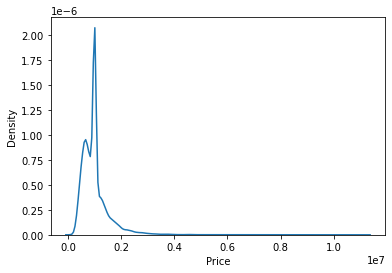

In [122]:
df['Price'].replace([np.nan], df['Price'].mean(), inplace=True)
sns.kdeplot(data=df, x="Price")

In [123]:
Suburb_le = LabelEncoder()
Address_le = LabelEncoder()
Type_le = LabelEncoder()
Method_le = LabelEncoder()
SellerG_le = LabelEncoder()
Date_le = LabelEncoder()
CouncilArea_le = LabelEncoder()
Regionname_le = LabelEncoder()

In [124]:
df['Suburb'] = Suburb_le.fit_transform(df['Suburb'])
df['Address'] = Address_le.fit_transform(df['Address'])
df['Type'] = Type_le.fit_transform(df['Type'])
df['Method'] = Method_le.fit_transform(df['Method'])
df['SellerG'] = SellerG_le.fit_transform(df['SellerG'])
df['Date'] = Date_le.fit_transform(df['Date'])
df['CouncilArea'] = CouncilArea_le.fit_transform(df['CouncilArea'])
df['Regionname'] = Regionname_le.fit_transform(df['Regionname'])

## Split Data

In [125]:
x = df.drop(["Price"], axis=1).values
y = df["Price"]

In [126]:
X_train , x_test , y_train ,y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [127]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [128]:
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [129]:
y_pred = model.predict(x_test)

In [55]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 128886035247.10828


In [56]:
accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(y_test, y_pred)
print("Accuracy:", accuracy.result().numpy())

Accuracy: 0.011106703


In [57]:
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
print("Recall:", recall.result().numpy())

Recall: 1.0


In [58]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# X = df.drop(["Price"], axis=1).values
Y = df["Price"].values
print(X.shape)
print(Y.shape)
print(Y)

In [60]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)
print(y_encoded)

[2384 2016 2301 ...  595 1662 1662]


In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

## Standardized Data

In [62]:
st_scaler = StandardScaler()
X_train = st_scaler.fit_transform(X_train)
X_test = st_scaler.transform(X_test)

## Build FFNN model

In [63]:
model = Sequential()
#Input layer & Hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))

#Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10



C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)



1241/1241 [==============================] - 3s 2ms/step - loss: 1.7672e-04 - accuracy: 0.0000e+00 - val_loss: 1.7531e-04 - val_accuracy: 0.0000e+00
Epoch 2/10
1241/1241 [==============================] - 2s 1ms/step - loss: 1.7672e-04 - accuracy: 0.0000e+00 - val_loss: 1.7531e-04 - val_accuracy: 0.0000e+00
Epoch 3/10
1241/1241 [==============================] - 2s 2ms/step - loss: 1.7672e-04 - accuracy: 0.0000e+00 - val_loss: 1.7531e-04 - val_accuracy: 0.0000e+00
Epoch 4/10
1241/1241 [==============================] - 2s 1ms/step - loss: 1.7672e-04 - accuracy: 0.0000e+00 - val_loss: 1.7531e-04 - val_accuracy: 0.0000e+00
Epoch 5/10
1241/1241 [==============================] - 2s 1ms/step - loss: 1.7672e-04 - accuracy: 0.0000e+00 - val_loss: 1.7531e-04 - val_accuracy: 0.0000e+00
Epoch 6/10
1241/1241 [==============================] - 2s 2ms/step - loss: 1.7672e-04 - accuracy: 0.0000e+00 - val_loss: 1.7531e-04 - val_accuracy: 0.0000e+00
Epoch 7/10
1241/1241 [============================

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                832       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
Y_pred = model.predict(X_test)
print(Y_pred[:2])

591/591 [==============================] - 1s 1ms/step
[[0.2682135 ]
 [0.03022751]]


In [67]:
Y_pred = Y_pred.argmax(axis=1)
print(Y_pred)
print(Y_test)

[0 0 0 ... 0 0 0]
[ 413 1662  559 ... 1662 1052 1511]


In [68]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       2.0
           9       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       2.0
          15       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       2.0
          18       0.00      0.00      0.00       1.0
          21       0.00      0.00      0.00       2.0
          24       0.00      0.00      0.00       1.0
          25       0.00    

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_cla

# Reccurent Neural Network

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [70]:
X = df.drop(["Price"], axis=1).values
y = df["Price"].values

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
X_train_reshaped = X_train_scaler.reshape((X_train_scaler.shape[0], 1, X_train_scaler.shape[1]))
X_test_reshaped = X_test_scaler.reshape((X_test_scaler.shape[0], 1, X_test_scaler.shape[1]))
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1418/1418 [==============================] - 3s 2ms/step - loss: 1272101732352.0000 - val_loss: 1256894889984.0000
Epoch 2/10
1418/1418 [==============================] - 2s 2ms/step - loss: 1269491302400.0000 - val_loss: 1253133254656.0000
Epoch 3/10
1418/1418 [==============================] - 2s 2ms/step - loss: 1264783720448.0000 - val_loss: 1247568855040.0000
Epoch 4/10
1418/1418 [==============================] - 2s 2ms/step - loss: 1258464346112.0000 - val_loss: 1240518098944.0000
Epoch 5/10
1418/1418 [==============================] - 2s 2ms/step - loss: 1250659401728.0000 - val_loss: 1231965388800.0000
Epoch 6/10
1418/1418 [==============================] - 2s 2ms/step - loss: 1241410306048.0000 - val_loss: 1222037078016.0000
Epoch 7/10
1418/1418 [==============================] - 2s 1ms/step - loss: 1230817722368.0000 - val_loss: 1210787954688.0000
Epoch 8/10
1418/1418 [==============================] - 2s 2ms/step - loss: 1218919006208.0000 - val_loss: 11982528839

In [ ]:
# mse = model.evaluate(X_test_reshaped, y_test)
print(f'Mean Squared Error on Test Set: {mse}')

y_pred = model.predict(X_test_reshaped)
y_pred_f2 = y_pred.flatten() 
print(y_test)
print(y_pred_f2)
plt.plot(y_test, label='Thực tế')
plt.plot(y_pred_f2, label='Dự đoán')
plt.legend()
plt.show()

# The Measures Avoid Overfitting

## First Measure: Regularization L1 and L2 For Model FFNN

In [74]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1, l2
from keras.utils import plot_model

In [75]:
model_l1 = Sequential()
model_l1.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1(0.01)))
model_l1.add(Dense(1, activation='sigmoid'))

In [76]:
model_l2 = Sequential()
model_l2.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model_l2.add(Dense(1, activation='sigmoid'))

In [77]:
model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
model_l1.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
model_l2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1418/1418 [==============================] - 3s 2ms/step - loss: -3318174711808.0000 - accuracy: 0.0000e+00 - val_loss: -9928739651584.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
1418/1418 [==============================] - 2s 1ms/step - loss: -21882902413312.0000 - accuracy: 0.0000e+00 - val_loss: -35879997407232.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
1418/1418 [==============================] - 2s 1ms/step - loss: -53894256263168.0000 - accuracy: 0.0000e+00 - val_loss: -73412701585408.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
1418/1418 [==============================] - 2s 1ms/step - loss: -96626706219008.0000 - accuracy: 0.0000e+00 - val_loss: -120997038522368.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
1418/1418 [==============================] - 2s 1ms/step - loss: -149257864609792.0000 - accuracy: 0.0000e+00 - val_loss: -178203461156864.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
1418/1418 [==============================] - 2s 1ms/step - loss: -211248134225920.0000 -

## Second Measure: Use LSTM or GRU for model RNN

In [79]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [80]:
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [81]:
X_train_reshaped = X_train_scaler.reshape((X_train_scaler.shape[0], 1, X_train_scaler.shape[1]))
X_test_reshaped = X_test_scaler.reshape((X_test_scaler.shape[0], 1, X_test_scaler.shape[1]))

In [82]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1418/1418 [==============================] - 3s 2ms/step - loss: 1271937105920.0000 - val_loss: 1256470872064.0000
Epoch 2/10
1418/1418 [==============================] - 2s 2ms/step - loss: 1268805271552.0000 - val_loss: 1252198842368.0000
Epoch 3/10
1418/1418 [==============================] - 2s 2ms/step - loss: 1263590309888.0000 - val_loss: 1246099931136.0000
Epoch 4/10
1418/1418 [==============================] - 2s 2ms/step - loss: 1256687796224.0000 - val_loss: 1238420422656.0000
Epoch 5/10
1418/1418 [==============================] - 2s 2ms/step - loss: 1248272318464.0000 - val_loss: 1229279723520.0000
Epoch 6/10
1418/1418 [==============================] - 2s 2ms/step - loss: 1238432219136.0000 - val_loss: 1218755690496.0000
Epoch 7/10
1418/1418 [==============================] - 2s 2ms/step - loss: 1227218354176.0000 - val_loss: 1206863659008.0000
Epoch 8/10
1418/1418 [==============================] - 2s 2ms/step - loss: 1214661656576.0000 - val_loss: 11936706068

394/394 [==============================] - 1s 1ms/step - loss: 1153653800960.0000
Mean Squared Error on Test Set: 1153653800960.0
394/394 [==============================] - 1s 1ms/step
[ 470000.          997898.24148824  530000.         ... 1080000.
  950000.          997898.24148824]
[56183.617 61208.324 50810.676 ... 40131.527 44508.22  52649.02 ]


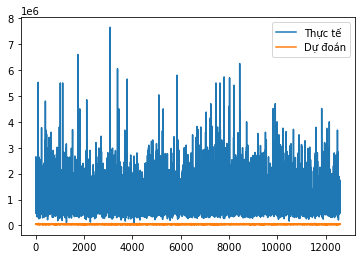

In [83]:
mse = model.evaluate(X_test_reshaped, y_test)
print(f'Mean Squared Error on Test Set: {mse}')

y_pred = model.predict(X_test_reshaped)
y_pred_f2 = y_pred.flatten() 
print(y_test)
print(y_pred_f2)
plt.plot(y_test, label='Thực tế')
plt.plot(y_pred_f2, label='Dự đoán')
plt.legend()
plt.show()

# Use Pre-Training Model, Process Control (Regularization) And Cross-Validation To Improve Accuracy

Libraries

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('iris.data')

In [6]:
x = df.drop(['Id', 'Species'], axis = 1)
y = df['Species']

In [7]:
x_train , x_test , y_train ,y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

Pre-Training Model, Process Control (Regularization)

In [8]:
model = LogisticRegression(random_state=42)

In [9]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_basic = accuracy_score(y_test, y_pred)
print(f'Độ chính xác của mô hình cơ bản: {accuracy_basic:.4f}')

Độ chính xác của mô hình cơ bản: 1.0000


In [12]:
model_improved = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42, max_iter=500)  # Tăng số lượng vòng lặp để đảm bảo hội tụ
)

In [13]:
model_improved.fit(x_train, y_train)
y_pred_improved = model_improved.predict(x_test)
accuracy_improved = accuracy_score(y_test, y_pred_improved)
print(f'Độ chính xác sau khi cải thiện: {accuracy_improved:.4f}')

Độ chính xác sau khi cải thiện: 1.0000


Cross-Validation

In [14]:
model = RandomForestClassifier(n_estimators=100)

In [15]:
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [16]:
scores = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')

In [17]:
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: {score:.4f}')

# In độ chính xác trung bình và độ chênh lệch chuẩn
print(f'\nMean Accuracy: {scores.mean():.4f}')
print(f'Standard Deviation: {scores.std():.4f}')

Fold 1: 1.0000
Fold 2: 0.9667
Fold 3: 0.9333
Fold 4: 0.9333
Fold 5: 0.9667

Mean Accuracy: 0.9600
Standard Deviation: 0.0249
